In [26]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import ast
from scipy.stats import rankdata
import seaborn as sns
import matplotlib.pyplot as plt

results_paths = [
	'coarse_gs2_results_giulia1.csv',
	'coarse_gs2_results_giulia2.csv',
	'coarse_gs2_results_irene.csv',
	'coarse_gs2_results_lorenzo.csv'
]
MEE = 'MEE'
MSE = 'MSE'
N_MODELS = 54
K = 3

# concatenate results into a single dataframe
scores_df = pd.DataFrame(columns=[])
for path in results_paths:
	partial_scores_df = pd.read_csv(path, sep=",")
	scores_df = pd.concat([scores_df, partial_scores_df], ignore_index=True)

########### SWAP COLUMNS ##########

# NOTE: delete for the fine grid search!

# val_mee_mean <--> val_mse_mean
# val_mee_dev <--> val_mse_dev
# splitX_val_mee <--> split0_val_mse

scores_df = scores_df.rename(
	columns = {
	"val_mee_mean": "val_MSE_mean",
	"val_mee_dev": "val_MSE_dev",
	"split0_val_mee": "split0_val_MSE",
	"split1_val_mee": "split1_val_MSE",
	"split2_val_mee": "split2_val_MSE",
	"val_mse_mean" : "val_MEE_mean",
	"val_mse_dev" : "val_MEE_dev",
	"split0_val_mse" : "split0_val_MEE",
	"split1_val_mse" : "split1_val_MEE",
	"split2_val_mse" : "split2_val_MEE"
	}
)

###########################################

# rank results
scores_df['val_%s_mean_rank'%MEE] = rankdata(scores_df['val_%s_mean'%MEE], method='dense')
scores_df['val_%s_mean_rank'%MSE] = rankdata(scores_df['val_%s_mean'%MSE], method='dense')
scores_df['tr_mee_mean_rank'] = rankdata(scores_df['tr_mee_mean'], method='dense')
scores_df['tr_mse_mean_rank'] = rankdata(scores_df['tr_mse_mean'], method='dense')

# sort results by 'val_score_mean_rank'
scores_df = scores_df.sort_values(by=['val_%s_mean_rank'%MEE], ignore_index=True)
scores_df.drop(scores_df.columns[0], axis=1, inplace=True)

columns_order = [
	'val_%s_mean_rank'%MSE,
	'val_%s_mean'%MSE,
	'val_%s_dev'%MSE,
	'val_%s_mean_rank'%MEE,
	'val_%s_mean'%MEE,
	'val_%s_dev'%MEE,
	'tr_mse_mean_rank',
	'tr_mse_mean',
	'tr_mse_dev',
	'tr_mee_mean_rank',
	'tr_mee_mean',
	'tr_mee_dev',
]
for i in range(K):
	columns_order.append('split%d_val_%s'%(i, MSE))
	columns_order.append('split%d_val_%s'%(i, MEE))
	columns_order.append('split%d_tr_mse'%(i))
	columns_order.append('split%d_tr_mee'%(i))
	columns_order.append('split%d_best_epoch'%(i))
columns_order.append('params')
scores_df = scores_df[columns_order]

# write params as csv deleting fixed params
rem_list = [ 
	'activation_out',
	'classification',
	'early_stopping',
	'evaluation_metric',
	'loss',
	'metric_decrease_tol',
	'random_state',
	'reinit_weights',
	'stopping_patience',
	'tau',
	'tol',
	'validation_size',
	'verbose',
	'weights_bound',
	'weights_dist',
	'epochs', # gs2
	'nesterov'
	]
params_df = pd.DataFrame(columns=[])
for param in scores_df['params']: # TODO: fare in modo migliore?
	params_dict = ast.literal_eval(param)
	for key in rem_list:
		del params_dict[key]
		params_dict['batch_size'] = str(params_dict['batch_size'])
	params_df = pd.concat([params_df, pd.DataFrame([params_dict])], ignore_index=True)


params_df['val_MEE_mean'] = scores_df['val_MEE_mean']
params_df['val_MEE_dev'] = scores_df['val_MEE_dev']
params_df['split0_val_MEE'] = scores_df['split0_val_MEE']
params_df['split1_val_MEE'] = scores_df['split1_val_MEE']
params_df['split2_val_MEE'] = scores_df['split2_val_MEE']
params_df['split0_best_epoch'] = scores_df['split0_best_epoch']
params_df['split1_best_epoch'] = scores_df['split1_best_epoch']
params_df['split2_best_epoch'] = scores_df['split2_best_epoch']

hidden_layer_sizes = []
for i in range(54):
	if (params_df['hidden_layer_sizes'][i]) == [20, 20, 20]:
		hidden_layer_sizes.append('3layer20')
	elif (params_df['hidden_layer_sizes'][i]) == [20, 20]:
		hidden_layer_sizes.append('2layer20')
	else:
		hidden_layer_sizes.append('1layer60')
params_df['hidden'] = hidden_layer_sizes
params_df

,activation_hidden,alpha,batch_size,hidden_layer_sizes,lambd,learning_rate,learning_rate_init,val_MEE_mean,val_MEE_dev,split0_val_MEE,split1_val_MEE,split2_val_MEE,split0_best_epoch,split1_best_epoch,split2_best_epoch,hidden
0,logistic,0.9,128,"[20, 20, 20]",0.0001,fixed,0.0050,1.471094,0.037880,1.522030,1.431255,1.459997,497.0,496.0,473.0,3layer20
1,logistic,0.7,128,"[20, 20]",0.0005,fixed,0.0500,1.471185,0.087932,1.577626,1.362280,1.473650,359.0,498.0,479.0,2layer20
2,logistic,0.7,128,"[20, 20]",0.0001,fixed,0.0500,1.479863,0.090948,1.606103,1.438071,1.395415,449.0,499.0,496.0,2layer20
3,logistic,0.7,128,"[20, 20]",0.0010,fixed,0.0500,1.480510,0.063826,1.569605,1.423427,1.448497,229.0,340.0,387.0,2layer20
4,logistic,0.9,128,"[20, 20, 20]",0.0005,fixed,0.0050,1.486053,0.082569,1.588588,1.386397,1.483175,497.0,490.0,464.0,3layer20
5,logistic,0.7,128,"[20, 20, 20]",0.0005,fixed,0.0500,1.488816,0.076520,1.595879,1.448922,1.421646,426.0,327.0,177.0,3layer20
6,logistic,0.9,128,"[20, 20]",0.0005,fixed,0.0050,1.491330,0.083307,1.601460,1.400023,1.472506,496.0,499.0,498.0,2layer20
7,logistic,0.7,128,"[20, 20, 20]",0.0001,fixed,0.0500,1.499663,0.042792,1.559414,1.478098,1.461477,351.0,492.0,477.0,3layer20
8,logistic,0.7,128,"[20, 20, 20]",0.0010,fixed,0.0500,1.500669,0.076486,1.555888,1.392510,1.553609,206.0,155.0,97.0,3layer20
9,logistic,0.7,128,[60],0.0010,fixed,0.0500,1.503138,0.074156,1.601040,1.421630,1.486743,351.0,451.0,408.0,1layer60


<AxesSubplot:xlabel='hidden', ylabel='alpha'>

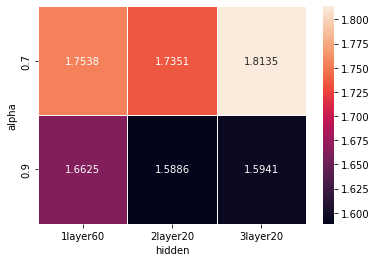

In [27]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_MEE_mean', 
        index='alpha',
        columns='hidden'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='lambd', ylabel='alpha'>

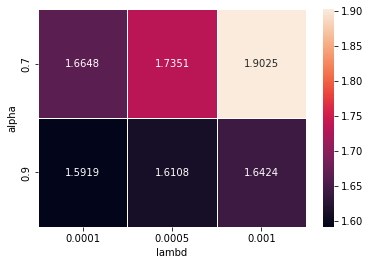

In [28]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_MEE_mean', 
        index='alpha',
        columns='lambd'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)


<AxesSubplot:xlabel='learning_rate_init', ylabel='alpha'>

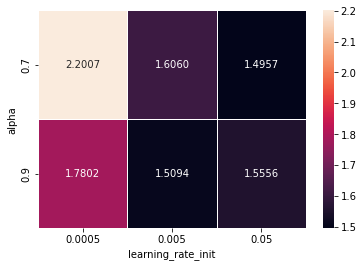

In [29]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_MEE_mean', 
        index='alpha',
        columns='learning_rate_init'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='lambd', ylabel='hidden'>

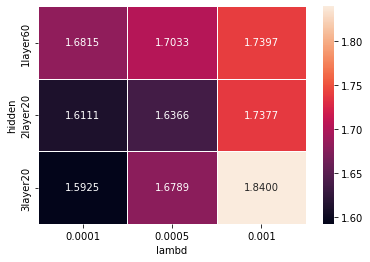

In [30]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_MEE_mean', 
        index='hidden',
        columns='lambd'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='learning_rate_init', ylabel='hidden'>

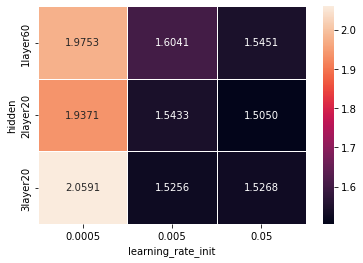

In [31]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_MEE_mean', 
        index='hidden',
        columns='learning_rate_init'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='learning_rate_init', ylabel='lambd'>

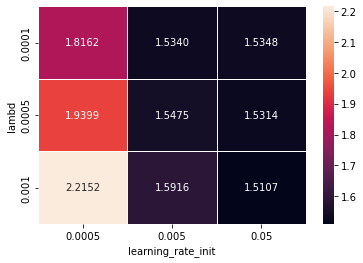

In [32]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_MEE_mean', 
        index='lambd',
        columns='learning_rate_init'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

Text(0, 0.5, 'val_MEE_mean')

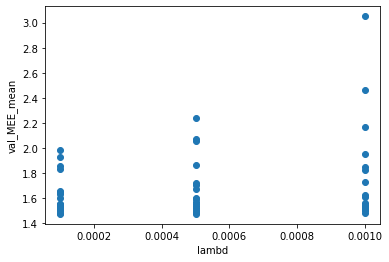

In [33]:
plt.scatter(params_df['lambd'], params_df['val_MEE_mean'])
plt.xlabel('lambd')
plt.ylabel('val_MEE_mean')

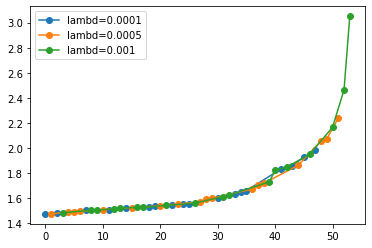

In [34]:
plt.plot(params_df.loc[params_df['lambd']==0.0001, 'val_MEE_mean'], 'o-', label='lambd=0.0001')
plt.plot(params_df.loc[params_df['lambd']==0.0005, 'val_MEE_mean'], 'o-', label='lambd=0.0005')
plt.plot(params_df.loc[params_df['lambd']==0.001, 'val_MEE_mean'], 'o-', label='lambd=0.001')
plt.legend()


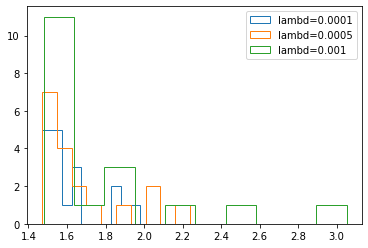

In [35]:
plt.hist(params_df.loc[params_df['lambd']==0.0001, 'val_MEE_mean'], histtype='step', label='lambd=0.0001')
plt.hist(params_df.loc[params_df['lambd']==0.0005, 'val_MEE_mean'], histtype='step', label='lambd=0.0005')
plt.hist(params_df.loc[params_df['lambd']==0.001, 'val_MEE_mean'], histtype='step', label='lambd=0.001')
plt.legend()

Text(0, 0.5, 'val_MEE_mean')

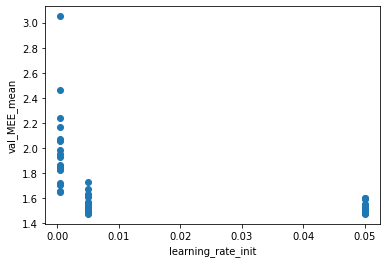

In [36]:
plt.scatter(params_df['learning_rate_init'], params_df['val_MEE_mean'])
plt.xlabel('learning_rate_init')
plt.ylabel('val_MEE_mean')

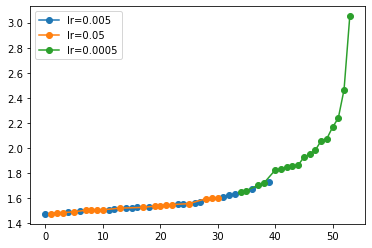

In [37]:
plt.plot(params_df.loc[params_df['learning_rate_init']==0.005, 'val_MEE_mean'], 'o-', label='lr=0.005')
plt.plot(params_df.loc[params_df['learning_rate_init']==0.05, 'val_MEE_mean'], 'o-', label='lr=0.05')
plt.plot(params_df.loc[params_df['learning_rate_init']==0.0005, 'val_MEE_mean'], 'o-', label='lr=0.0005')
plt.legend()

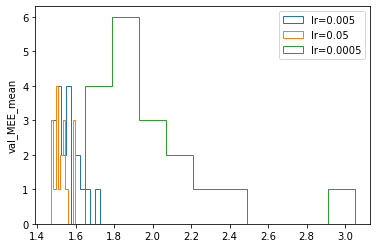

In [38]:
plt.hist(params_df.loc[params_df['learning_rate_init']==0.005, 'val_MEE_mean'], histtype='step', label='lr=0.005')
plt.hist(params_df.loc[params_df['learning_rate_init']==0.05, 'val_MEE_mean'], histtype='step', label='lr=0.05')
plt.hist(params_df.loc[params_df['learning_rate_init']==0.0005, 'val_MEE_mean'], histtype='step', label='lr=0.0005')
plt.ylabel('val_MEE_mean')
plt.legend()

Text(0, 0.5, 'val_MEE_mean')

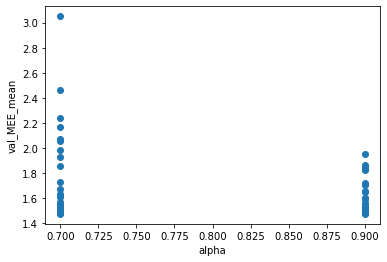

In [39]:
plt.scatter(params_df['alpha'], params_df['val_MEE_mean'])
plt.xlabel('alpha')
plt.ylabel('val_MEE_mean')

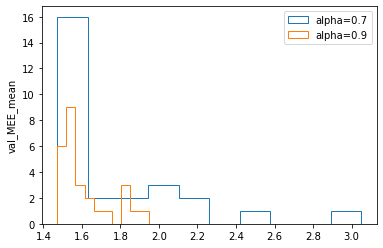

In [40]:
plt.hist(params_df.loc[params_df['alpha']==0.7, 'val_MEE_mean'], histtype='step', label='alpha=0.7')
plt.hist(params_df.loc[params_df['alpha']==0.9, 'val_MEE_mean'], histtype='step', label='alpha=0.9')
plt.ylabel('val_MEE_mean')
plt.legend()

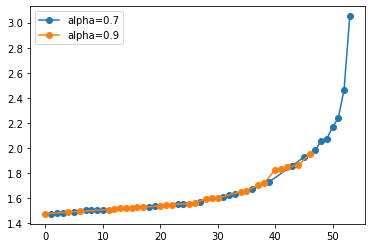

In [41]:
plt.plot(params_df.loc[params_df['alpha']==0.7, 'val_MEE_mean'], 'o-', label='alpha=0.7')
plt.plot(params_df.loc[params_df['alpha']==0.9, 'val_MEE_mean'], 'o-', label='alpha=0.9')
plt.legend()

Text(0, 0.5, 'val_MEE_mean')

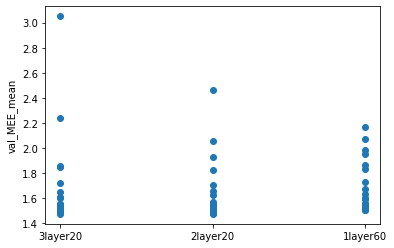

In [42]:
plt.scatter(params_df['hidden'], params_df['val_MEE_mean'])
plt.ylabel('val_MEE_mean')

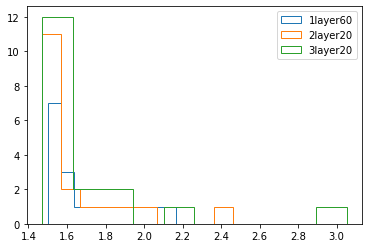

In [43]:
plt.hist(params_df.loc[params_df['hidden']=='1layer60', 'val_MEE_mean'], histtype='step', label='1layer60')
plt.hist(params_df.loc[params_df['hidden']=='2layer20', 'val_MEE_mean'], histtype='step', label='2layer20')
plt.hist(params_df.loc[params_df['hidden']=='3layer20', 'val_MEE_mean'], histtype='step', label='3layer20')
plt.legend()

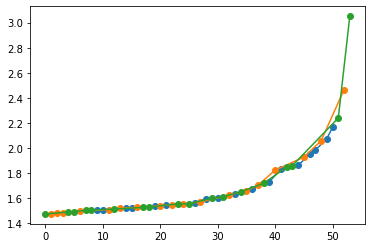

In [44]:
plt.plot(params_df.loc[params_df['hidden']=='1layer60', 'val_MEE_mean'], 'o-', label='1layer60')
plt.plot(params_df.loc[params_df['hidden']=='2layer20', 'val_MEE_mean'], 'o-', label='2layer20')
plt.plot(params_df.loc[params_df['hidden']=='3layer20', 'val_MEE_mean'], 'o-', label='3layer20')

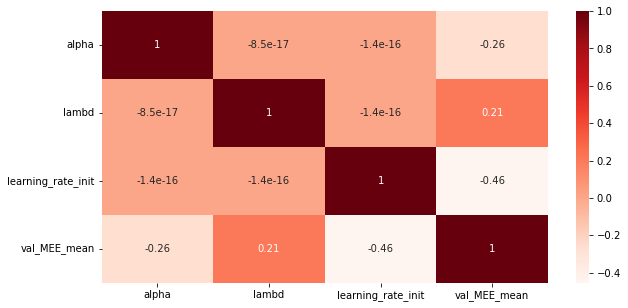

In [45]:
plt.figure(figsize=(10,5))
sns.heatmap(params_df[['alpha', 'lambd', 'learning_rate_init', 'val_MEE_mean']].corr(), cmap=plt.cm.Reds, annot=True)
plt.show()

Text(0, 0.5, 'val_MEE_mean')

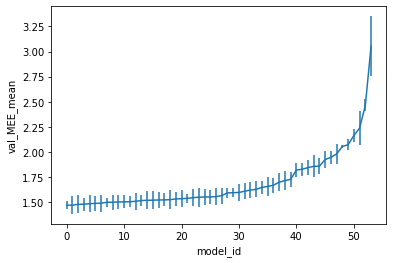

In [46]:
plt.errorbar(x=np.arange(N_MODELS), y=params_df['val_MEE_mean'], yerr=params_df['val_MEE_dev'])
plt.xlabel("model_id")
plt.ylabel("val_MEE_mean")

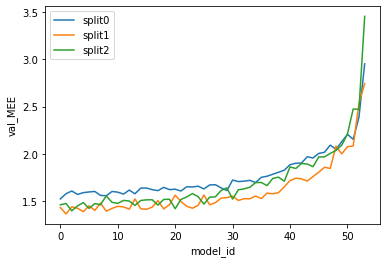

In [47]:
plt.plot(np.arange(N_MODELS), params_df['split0_val_MEE'], label='split0')
plt.plot(np.arange(N_MODELS), params_df['split1_val_MEE'], label='split1')
plt.plot(np.arange(N_MODELS), params_df['split2_val_MEE'], label='split2')
plt.xlabel("model_id")
plt.ylabel("val_MEE")
plt.legend()

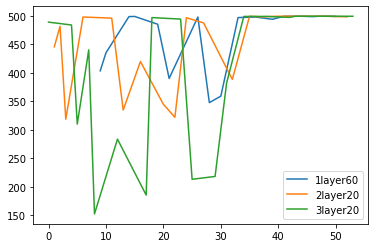

In [51]:
plt.plot((params_df['split0_best_epoch'][params_df['hidden']=='1layer60']+
		params_df['split1_best_epoch'][params_df['hidden']=='1layer60']+
		params_df['split2_best_epoch'][params_df['hidden']=='1layer60'])/3
		,label='1layer60')
plt.plot((params_df['split0_best_epoch'][params_df['hidden']=='2layer20']+
		params_df['split1_best_epoch'][params_df['hidden']=='2layer20']+
		params_df['split2_best_epoch'][params_df['hidden']=='2layer20'])/3
		,label='2layer20')
plt.plot((params_df['split0_best_epoch'][params_df['hidden']=='3layer20']+
		params_df['split1_best_epoch'][params_df['hidden']=='3layer20']+
		params_df['split2_best_epoch'][params_df['hidden']=='3layer20'])/3
		,label='3layer20')
plt.legend()

In [49]:
# TENIAMO IN CONSIDERAZIONE CHE:
# reti più grosse => regolarizzazione maggiore (+pesi=+parametri)
# favorire modelli con lambda più alto se hanno pari perf (meno complessi, meno probabile che vadano in overfitting)
# se non troviamo trend => facciamo ensemble (oppure se dev std alta)

# DA VISUALIZZARE:
# 3d heatmap per ogni topoplogia
# test statistici per media e dev standard?
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html
# plot medie e dev standard MEE (applicare 1-standard error rule)

# A CUI PENSARE:
# ultima va male perchè momentum e lr sono bassi e necessitavano di più epoche (ciò significa che il momentum è implementato bene)
# lr > 0.0005 in gs2 (rank 36/54)

# NEL FRATTEMPO:
# Pulire codice gs e val e nel frattempo e mettere su script per ensemble / evaluation finale?
# Per la classificazione fare controlli in score (target encoding) 
# Rivedere implementazione metriche!!! Eventualmente implementare score in modo che prenda una lista di metriche e restituisca una lista di predizioni. 
# Senza linear decay non fare il controllo su tau 
# Fare test su Monk, curve e risultati in tabella (migliore configurazione)

# La chiave sta nel velocizzare il train scartate le combinazioni che esplodono / si bloccano?
# Le altre in principio con un numero grande di epoche e una buona regolarizzazione migliorano...

#Attenzione con batch size 128 quanti batch ci sono
#Giustificazione topologia e f attivazione prima gs
#Vedere metriche sul train, plotting overfitting? quando lambda piccolo va in overfitting?
#Vedere regolarità curve con zoom

# se fissiamo un massimo di 500 epoche (motivare) possiamo aumentare momentum / diminuire lr e viceversa
# nesterov dovrebbe velocizzare ancora di più!
# perchè linear decay va male? learning rate troppo piccolo => training si blocca?? bisognerebbe vedere se epoca migliore è << max (ma quando sono 200 magari sono già troppo poche per vederlo)

# come individuare cosa non andava in quelle che esplodevano?
# prendiamo le ultime x e contiamo qual'è il parametro più frequente


# come clusterizzare configurazioni simili tenendo in considerazione media e dev std?
"""
I PRIMI 14 (numero quasi arbitrario) RAGGRUPPATI PER TOPOLOGIA E ORDINATI PER RANK

	alpha						lambd				lr

 1 ,  0.7 ,"[20, 20]"         ,0.0005 ,            0.05
 2 ,  0.7 ,"[20, 20]"         ,0.0001 ,            0.05
 3 ,  0.7 ,"[20, 20]"         ,0.001  ,            0.05
 6 ,  0.9 ,"[20, 20]"         ,0.0005 ,            0.005
11 ,  0.9 ,"[20, 20]"         ,0.0001 ,            0.005
13 ,  0.9 ,"[20, 20]"         ,0.001  ,            0.05

 0 ,  0.9 ,"[20, 20, 20]"     ,0.0001 ,            0.005
 4 ,  0.9 ,"[20, 20, 20]"     ,0.0005 ,            0.005
 5 ,  0.7 ,"[20, 20, 20]"     ,0.0005 ,            0.05
 7 ,  0.7 ,"[20, 20, 20]"     ,0.0001 ,            0.05
 8 ,  0.7 ,"[20, 20, 20]"     ,0.001  ,            0.05
12 ,  0.9 ,"[20, 20, 20]"     ,0.001  ,            0.005

 9 ,  0.7 ,[60]               ,0.001  ,            0.05
10 ,  0.7 ,[60]               ,0.0005 ,            0.05
14 ,  0.9 ,[60]               ,0.0001 ,            0.005

alpha 0.7 => lr più grande
alpha 0.9 => lr più piccolo (alpha grande 'accelera')

"""